# Importing the raw data

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics

In [3]:
file = './data_for_training2022-04-19.csv'
basedf = pd.read_csv(file, index_col=False)

basedf = basedf.reset_index()
basedf['content']

0                               Mi történt a választáson?
1        A Mandiner a magyar nyilvánosság neves szerep...
2        Újabb interjúalanyunk: Dörner György színművé...
3                                                     ***
4       Milyen érzelmet váltott ki önből, hogy ekkora ...
                              ...                        
1349                                       A telefonszám:
1350                                       06-30-288-6174
1351                                     Keressen minket!
1352    A telefonszámon hívásokra nem válaszolunk, ha ...
1353                                              hu@hvg.
Name: content, Length: 1354, dtype: object

In [4]:
#Changing nan writer values to 'Unknown'

basedf['writer'] = basedf['writer'].replace(np.nan, 'Unknown')


In [5]:
writers = []
writers = basedf['writer'].unique()

for i in range(len(basedf['writer'])):
    writerindex = np.where(writers == basedf['writer'][i])
    basedf['writer'][i] = writerindex[0][0]

#basedf['writer']

C:\Users\simon\AppData\Local\Temp/ipykernel_17328/3037653877.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basedf['writer'][i] = writerindex[0][0]


In [6]:
sites = []
sites = basedf['site'].unique()

for i in range(len(basedf['site'])):
    siteindex = np.where(sites == basedf['site'][i])
    basedf['site'][i] = siteindex[0][0]

basedf['site']

C:\Users\simon\AppData\Local\Temp/ipykernel_17328/413617624.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basedf['site'][i] = siteindex[0][0]


0       0
1       0
2       0
3       0
4       0
       ..
1349    2
1350    2
1351    2
1352    2
1353    2
Name: site, Length: 1354, dtype: object

In [7]:
basedf['sentencelabel'] = 0
temp= 'doccano_text.csv'
doccano_alldata = pd.read_csv(temp)

basedf['sentencelabel']=doccano_alldata['label']

labelingdf = basedf[['content', 'sentencelabel']]


#from datetime import datetime
#labelingdf.to_csv('data_for_labeling' + datetime.today().strftime('%Y-%m-%d') + '.csv', index=False)

basedf

,index,title,site,date,writer,content,comments,label,sentencelabel
0,0,"Az ellenzéki szavazóknak is jobb, hogy így ala...",0,2022. április 18. 13:00,0,Mi történt a választáson?,NaN,0,1
1,1,"Az ellenzéki szavazóknak is jobb, hogy így ala...",0,2022. április 18. 13:00,0,A Mandiner a magyar nyilvánosság neves szerep...,NaN,0,1
2,2,"Az ellenzéki szavazóknak is jobb, hogy így ala...",0,2022. április 18. 13:00,0,Újabb interjúalanyunk: Dörner György színművé...,NaN,0,1
3,3,"Az ellenzéki szavazóknak is jobb, hogy így ala...",0,2022. április 18. 13:00,0,***,NaN,0,2
4,4,"Az ellenzéki szavazóknak is jobb, hogy így ala...",0,2022. április 18. 13:00,0,"Milyen érzelmet váltott ki önből, hogy ekkora ...",NaN,0,2
...,...,...,...,...,...,...,...,...,...
1349,1349,Itthon: Elmondana nekünk valamit? Üzenjen What...,2,2022. április. 16. 11:10,1,A telefonszám:,NaN,0,1
1350,1350,Itthon: Elmondana nekünk valamit? Üzenjen What...,2,2022. április. 16. 11:10,1,06-30-288-6174,NaN,0,1
1351,1351,Itthon: Elmondana nekünk valamit? Üzenjen What...,2,2022. április. 16. 11:10,1,Keressen minket!,NaN,0,1
1352,1352,Itthon: Elmondana nekünk valamit? Üzenjen What...,2,2022. április. 16. 11:10,1,"A telefonszámon hívásokra nem válaszolunk, ha ...",NaN,0,2


In [8]:
basedf['label'][4]
ideiglenes_poz=0
ideiglenes_neg=0
for i in range(len(basedf['label'])):
    if basedf['sentencelabel'][i]==1:
        ideiglenes_poz=ideiglenes_poz+1
    else:
        ideiglenes_neg=ideiglenes_neg+1
print(len(basedf['title']))
print(ideiglenes_poz)
print(ideiglenes_neg)
#basedf

1354
715
639


In [9]:
ideiglenes_poz=0
ideiglenes_neg=0
for i in range(27):
    if basedf['sentencelabel'][i]==1:
        ideiglenes_poz=ideiglenes_poz+1
    else:
        ideiglenes_neg=ideiglenes_neg+1

print(ideiglenes_poz)
print(ideiglenes_neg)

for i in range(27):
    if ideiglenes_poz> ideiglenes_neg:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2
#basedf

12
15


C:\Users\simon\AppData\Local\Temp/ipykernel_17328/1202515977.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basedf['label'][i]=2


In [10]:
titles = []
titles = basedf['title'].unique()
print(len(titles))
sum=[]
sum=np.zeros(len(titles))
#print(titles)
type(titles)
print(titles[0])

for i in range(len(basedf['label'])):
    for k in range(len(titles)):
        if basedf['title'][i]==titles[k]:
            sum[k]=sum[k]+1
print(sum)

59
Az ellenzéki szavazóknak is jobb, hogy így alakult – Dörner György a Mandinernek
[ 27.  18.   7.  13.  31.  14.   8.  45.  13.  59. 151.   8.  11.  35.
  10.  27.  11.  10.   5.  11.  37.  31.  44.  22.  41.  16.  13.  32.
  47.  42.   8.  38.  14.   8.  16.  32.  66.  58.  25.  32.   3.   6.
  15.  14.   8.   9.  15.  16.  14.  11.  15.  13.  13.   6.   7.  12.
  15.  15.  11.]


In [11]:
sentence_length=np.zeros(len(basedf['label']))
positive_sentences=np.zeros(len(basedf['label']))
negative_sentences=np.zeros(len(basedf['label']))
positive_sentences=positive_sentences.tolist()
negative_sentences=negative_sentences.tolist()
sum_pos=np.zeros((60), dtype=int)
sum_neg=np.zeros((60), dtype=int)
helper_sum_pos=np.zeros(len(basedf['label']))
helper_sum_neg=np.zeros(len(basedf['label']))

In [12]:
#sentence_length=np.zeros(len(basedf['label']))
#positive_sentences=np.zeros(len(basedf['label']))
#negative_sentences=np.zeros(len(basedf['label']))
#positive_sentences.tolist()
#negative_sentences.tolist()
for i in range(28):
    sentence_length[i]=28

for i in range(28):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[0]=sum_pos[0]+1
    else:
        negative_sentences[i]=1
        sum_neg[0]=sum_neg[0]+1

for i in range(28):
    
    if sum_pos[0]>sum_neg[0]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(28):
    helper_sum_pos[i]=sum_pos[0]
    helper_sum_neg[i]=sum_neg[0]

for i in range(28,45):
    sentence_length[i]=18
    
for i in range(28,45):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[1]=sum_pos[1]+1
    else:
        negative_sentences[i]=1
        sum_neg[1]=sum_neg[1]+1

for i in range(28,45):
    
    if sum_pos[1]>sum_neg[1]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(28,45):
    helper_sum_pos[i]=sum_pos[1]
    helper_sum_neg[i]=sum_neg[1]

for i in range(45,52):
    sentence_length[i]=7
        
for i in range(45,52):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[2]=sum_pos[2]+1
    else:
        negative_sentences[i]=1
        sum_neg[2]=sum_neg[2]+1

for i in range(45,52):
    
    if sum_pos[2]>sum_neg[2]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(45,52):
    helper_sum_pos[i]=sum_pos[2]
    helper_sum_neg[i]=sum_neg[2]

for i in range(52,65):
    sentence_length[i]=13
    
for i in range(52,65):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[3]=sum_pos[3]+1
    else:
        negative_sentences[i]=1
        sum_neg[3]=sum_neg[3]+1

for i in range(52,65):
    
    if sum_pos[3]>sum_neg[3]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(52,65):
    helper_sum_pos[i]=sum_pos[3]
    helper_sum_neg[i]=sum_neg[3]

for i in range(65,96):
    sentence_length[i]=31
        
for i in range(65,96):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[4]=sum_pos[4]+1
    else:
        negative_sentences[i]=1
        sum_neg[4]=sum_neg[4]+1

for i in range(65,96):
    
    if sum_pos[4]>sum_neg[4]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(65,96):
    helper_sum_pos[i]=sum_pos[4]
    helper_sum_neg[i]=sum_neg[4]

for i in range(96,110):
    sentence_length[i]=14
        
for i in range(96,110):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[5]=sum_pos[5]+1
    else:
        negative_sentences[i]=1
        sum_neg[5]=sum_neg[5]+1

for i in range(96,110):
    
    if sum_pos[5]>sum_neg[5]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(96,110):
    helper_sum_pos[i]=sum_pos[5]
    helper_sum_neg[i]=sum_neg[5]

for i in range(110,118):
    sentence_length[i]=8
        
for i in range(110,118):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[6]=sum_pos[6]+1
    else:
        negative_sentences[i]=1
        sum_neg[6]=sum_neg[6]+1

for i in range(110,118):
    
    if sum_pos[6]>sum_neg[6]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(110,118):
    helper_sum_pos[i]=sum_pos[6]
    helper_sum_neg[i]=sum_neg[6]

for i in range(118,163):
    sentence_length[i]=45
        
for i in range(118,163):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[7]=sum_pos[7]+1
    else:
        negative_sentences[i]=1
        sum_neg[7]=sum_neg[7]+1

for i in range(118,163):
    
    if sum_pos[7]>sum_neg[7]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(118,163):
    helper_sum_pos[i]=sum_pos[7]
    helper_sum_neg[i]=sum_neg[7]

for i in range(163,176):
    sentence_length[i]=13
        
for i in range(163,176):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[8]=sum_pos[8]+1
    else:
        negative_sentences[i]=1
        sum_neg[8]=sum_neg[8]+1

for i in range(163,176):
    
    if sum_pos[8]>sum_neg[8]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(163,176):
    helper_sum_pos[i]=sum_pos[8]
    helper_sum_neg[i]=sum_neg[8]

for i in range(176,235):
    sentence_length[i]=59
        
for i in range(176,235):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[9]=sum_pos[9]+1
    else:
        negative_sentences[i]=1
        sum_neg[9]=sum_neg[9]+1

for i in range(176,235):
    
    if sum_pos[9]>sum_neg[9]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(176,235):
    helper_sum_pos[i]=sum_pos[9]
    helper_sum_neg[i]=sum_neg[9]

for i in range(235,386):
    sentence_length[i]=151
        
for i in range(235,386):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[10]=sum_pos[10]+1
    else:
        negative_sentences[i]=1
        sum_neg[10]=sum_neg[10]+1

for i in range(235,386):
    
    if sum_pos[10]>sum_neg[10]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(235,386):
    helper_sum_pos[i]=sum_pos[10]
    helper_sum_neg[i]=sum_neg[10]

for i in range(386,394):
    sentence_length[i]=8
        
for i in range(386,394):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[11]=sum_pos[11]+1
    else:
        negative_sentences[i]=1
        sum_neg[11]=sum_neg[11]+1

for i in range(386,394):
    
    if sum_pos[11]>sum_neg[11]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(386,394):
    helper_sum_pos[i]=sum_pos[11]
    helper_sum_neg[i]=sum_neg[11]

for i in range(394,405):
    sentence_length[i]=11
        
for i in range(394,405):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[12]=sum_pos[12]+1
    else:
        negative_sentences[i]=1
        sum_neg[12]=sum_neg[12]+1

for i in range(394,405):
    
    if sum_pos[12]>sum_neg[12]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(394,405):
    helper_sum_pos[i]=sum_pos[12]
    helper_sum_neg[i]=sum_neg[12]

for i in range(405,440):
    sentence_length[i]=35
        
for i in range(405,440):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[13]=sum_pos[13]+1
    else:
        negative_sentences[i]=1
        sum_neg[13]=sum_neg[13]+1

for i in range(405,440):
    
    if sum_pos[13]>sum_neg[13]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(405,440):
    helper_sum_pos[i]=sum_pos[13]
    helper_sum_neg[i]=sum_neg[13]

for i in range(440,450):
    sentence_length[i]=10
        
for i in range(440,450):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[14]=sum_pos[14]+1
    else:
        negative_sentences[i]=1
        sum_neg[14]=sum_neg[14]+1

for i in range(440,450):
    
    if sum_pos[14]>sum_neg[14]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(440,450):
    helper_sum_pos[i]=sum_pos[14]
    helper_sum_neg[i]=sum_neg[14]

for i in range(450,477):
    sentence_length[i]=27
        
for i in range(450,477):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[15]=sum_pos[15]+1
    else:
        negative_sentences[i]=1
        sum_neg[15]=sum_neg[15]+1

for i in range(450,477):
    
    if sum_pos[15]>sum_neg[15]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(450,477):
    helper_sum_pos[i]=sum_pos[15]
    helper_sum_neg[i]=sum_neg[15]

for i in range(477,488):
    sentence_length[i]=11
        
for i in range(477,488):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[16]=sum_pos[16]+1
    else:
        negative_sentences[i]=1
        sum_neg[16]=sum_neg[16]+1

for i in range(477,488):
    
    if sum_pos[16]>sum_neg[16]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(477,488):
    helper_sum_pos[i]=sum_pos[16]
    helper_sum_neg[i]=sum_neg[16]

for i in range(488,498):
    sentence_length[i]=10
        
for i in range(488,498):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[17]=sum_pos[17]+1
    else:
        negative_sentences[i]=1
        sum_neg[17]=sum_neg[17]+1

for i in range(488,498):
    
    if sum_pos[17]>sum_neg[17]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(488,498):
    helper_sum_pos[i]=sum_pos[17]
    helper_sum_neg[i]=sum_neg[17]

for i in range(498,503):
    sentence_length[i]=5
        
for i in range(498,503):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[18]=sum_pos[18]+1
    else:
        negative_sentences[i]=1
        sum_neg[18]=sum_neg[18]+1

for i in range(498,503):
    
    if sum_pos[18]>sum_neg[18]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(498,503):
    helper_sum_pos[i]=sum_pos[18]
    helper_sum_neg[i]=sum_neg[18]

for i in range(503,514):
    sentence_length[i]=11
        
for i in range(503,514):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[19]=sum_pos[19]+1
    else:
        negative_sentences[i]=1
        sum_neg[19]=sum_neg[19]+1

for i in range(503,514):
    
    if sum_pos[19]>sum_neg[19]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(503,514):
    helper_sum_pos[i]=sum_pos[19]
    helper_sum_neg[i]=sum_neg[19]

for i in range(514,551):
    sentence_length[i]=37
        
for i in range(514,551):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[20]=sum_pos[20]+1
    else:
        negative_sentences[i]=1
        sum_neg[20]=sum_neg[20]+1

for i in range(514,551):
    
    if sum_pos[20]>sum_neg[20]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(514,551):
    helper_sum_pos[i]=sum_pos[20]
    helper_sum_neg[i]=sum_neg[20]

for i in range(551,582):
    sentence_length[i]=31
        
for i in range(551,582):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[21]=sum_pos[21]+1
    else:
        negative_sentences[i]=1
        sum_neg[21]=sum_neg[21]+1

for i in range(551,582):
    
    if sum_pos[21]>sum_neg[21]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(551,582):
    helper_sum_pos[i]=sum_pos[21]
    helper_sum_neg[i]=sum_neg[21]

for i in range(582,626):
    sentence_length[i]=44
        
for i in range(582,626):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[22]=sum_pos[22]+1
    else:
        negative_sentences[i]=1
        sum_neg[22]=sum_neg[22]+1

for i in range(582,626):
    
    if sum_pos[22]>sum_neg[22]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(582,626):
    helper_sum_pos[i]=sum_pos[22]
    helper_sum_neg[i]=sum_neg[22]

for i in range(626,648):
    sentence_length[i]=22
        
for i in range(626,648):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[23]=sum_pos[23]+1
    else:
        negative_sentences[i]=1
        sum_neg[23]=sum_neg[23]+1

for i in range(626,648):
    
    if sum_pos[23]>sum_neg[23]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(626,648):
    helper_sum_pos[i]=sum_pos[23]
    helper_sum_neg[i]=sum_neg[23]

for i in range(648,689):
    sentence_length[i]=41
        
for i in range(648,689):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[24]=sum_pos[24]+1
    else:
        negative_sentences[i]=1
        sum_neg[24]=sum_neg[24]+1

for i in range(648,689):
    
    if sum_pos[24]>sum_neg[24]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(648,689):
    helper_sum_pos[i]=sum_pos[24]
    helper_sum_neg[i]=sum_neg[24]

for i in range(689,705):
    sentence_length[i]=16
        
for i in range(689,705):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[25]=sum_pos[25]+1
    else:
        negative_sentences[i]=1
        sum_neg[25]=sum_neg[25]+1

for i in range(689,705):
    
    if sum_pos[25]>sum_neg[25]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(689,705):
    helper_sum_pos[i]=sum_pos[25]
    helper_sum_neg[i]=sum_neg[25]

for i in range(705,718):
    sentence_length[i]=13
        
for i in range(705,718):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[26]=sum_pos[26]+1
    else:
        negative_sentences[i]=1
        sum_neg[26]=sum_neg[26]+1

for i in range(705,718):
    
    if sum_pos[26]>sum_neg[26]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(705,718):
    helper_sum_pos[i]=sum_pos[26]
    helper_sum_neg[i]=sum_neg[26]

for i in range(718,750):
    sentence_length[i]=32
        
for i in range(718,750):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[27]=sum_pos[27]+1
    else:
        negative_sentences[i]=1
        sum_neg[27]=sum_neg[27]+1

for i in range(718,750):
    
    if sum_pos[27]>sum_neg[27]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(718,750):
    helper_sum_pos[i]=sum_pos[27]
    helper_sum_neg[i]=sum_neg[27]

for i in range(750,797):
    sentence_length[i]=47
        
for i in range(750,797):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[28]=sum_pos[28]+1
    else:
        negative_sentences[i]=1
        sum_neg[28]=sum_neg[28]+1

for i in range(750,797):
    
    if sum_pos[28]>sum_neg[28]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(750,797):
    helper_sum_pos[i]=sum_pos[28]
    helper_sum_neg[i]=sum_neg[28]

for i in range(797,839):
    sentence_length[i]=42
        
for i in range(797,839):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[29]=sum_pos[29]+1
    else:
        negative_sentences[i]=1
        sum_neg[29]=sum_neg[29]+1

for i in range(797,839):
    
    if sum_pos[29]>sum_neg[29]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(797,839):
    helper_sum_pos[i]=sum_pos[29]
    helper_sum_neg[i]=sum_neg[29]

for i in range(839,847):
    sentence_length[i]=8
        
for i in range(839,847):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[30]=sum_pos[30]+1
    else:
        negative_sentences[i]=1
        sum_neg[30]=sum_neg[30]+1

for i in range(839,847):
    
    if sum_pos[30]>sum_neg[30]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(839,847):
    helper_sum_pos[i]=sum_pos[30]
    helper_sum_neg[i]=sum_neg[30]

for i in range(847,885):
    sentence_length[i]=38
        
for i in range(847,885):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[31]=sum_pos[31]+1
    else:
        negative_sentences[i]=1
        sum_neg[31]=sum_neg[31]+1

for i in range(847,885):
    
    if sum_pos[31]>sum_neg[31]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(847,885):
    helper_sum_pos[i]=sum_pos[31]
    helper_sum_neg[i]=sum_neg[31]

for i in range(885,899):
    sentence_length[i]=14
        
for i in range(885,899):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[32]=sum_pos[32]+1
    else:
        negative_sentences[i]=1
        sum_neg[32]=sum_neg[32]+1

for i in range(855,899):
    
    if sum_pos[32]>sum_neg[32]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(855,899):
    helper_sum_pos[i]=sum_pos[32]
    helper_sum_neg[i]=sum_neg[32]

for i in range(899,907):
    sentence_length[i]=8
        
for i in range(899,907):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[33]=sum_pos[33]+1
    else:
        negative_sentences[i]=1
        sum_neg[33]=sum_neg[33]+1

for i in range(899,907):
    
    if sum_pos[33]>sum_neg[33]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(899,907):
    helper_sum_pos[i]=sum_pos[33]
    helper_sum_neg[i]=sum_neg[33]

for i in range(907,923):
    sentence_length[i]=16
        
for i in range(907,923):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[34]=sum_pos[34]+1
    else:
        negative_sentences[i]=1
        sum_neg[34]=sum_neg[34]+1

for i in range(907,923):
    
    if sum_pos[34]>sum_neg[34]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(907,923):
    helper_sum_pos[i]=sum_pos[34]
    helper_sum_neg[i]=sum_neg[34]

for i in range(923,955):
    sentence_length[i]=32
        
for i in range(923,955):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[35]=sum_pos[35]+1
    else:
        negative_sentences[i]=1
        sum_neg[35]=sum_neg[35]+1

for i in range(923,955):
    
    if sum_pos[35]>sum_neg[35]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(923,955):
    helper_sum_pos[i]=sum_pos[35]
    helper_sum_neg[i]=sum_neg[35]

for i in range(955,1021):
    sentence_length[i]=66
        
for i in range(955,1021):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[36]=sum_pos[36]+1
    else:
        negative_sentences[i]=1
        sum_neg[36]=sum_neg[36]+1

for i in range(955,1021):
    
    if sum_pos[36]>sum_neg[36]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(955,1021):
    helper_sum_pos[i]=sum_pos[36]
    helper_sum_neg[i]=sum_neg[36]

for i in range(1021,1079):
    sentence_length[i]=58
        
for i in range(1021,1079):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[37]=sum_pos[37]+1
    else:
        negative_sentences[i]=1
        sum_neg[37]=sum_neg[37]+1

for i in range(1021,1079):
    
    if sum_pos[37]>sum_neg[37]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1021,1079):
    helper_sum_pos[i]=sum_pos[37]
    helper_sum_neg[i]=sum_neg[37]

for i in range(1079,1104):
    sentence_length[i]=25
        
for i in range(1079,1104):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[38]=sum_pos[38]+1
    else:
        negative_sentences[i]=1
        sum_neg[38]=sum_neg[38]+1

for i in range(1079,1104):
    
    if sum_pos[38]>sum_neg[38]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1079,1104):
    helper_sum_pos[i]=sum_pos[38]
    helper_sum_neg[i]=sum_neg[38]

for i in range(1104,1136):
    sentence_length[i]=32
        
for i in range(1104,1136):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[39]=sum_pos[39]+1
    else:
        negative_sentences[i]=1
        sum_neg[39]=sum_neg[39]+1

for i in range(1104,1136):
    
    if sum_pos[39]>sum_neg[39]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1104,1136):
    helper_sum_pos[i]=sum_pos[39]
    helper_sum_neg[i]=sum_neg[39]

for i in range(1136,1139):
    sentence_length[i]=3
        
for i in range(1136,1139):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[40]=sum_pos[40]+1
    else:
        negative_sentences[i]=1
        sum_neg[40]=sum_neg[40]+1

for i in range(1136,1139):
    
    if sum_pos[40]>sum_neg[40]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1136,1139):
    helper_sum_pos[i]=sum_pos[40]
    helper_sum_neg[i]=sum_neg[40]

for i in range(1139,1145):
    sentence_length[i]=6
        
for i in range(1139,1145):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[41]=sum_pos[41]+1
    else:
        negative_sentences[i]=1
        sum_neg[41]=sum_neg[41]+1

for i in range(1139,1145):
    
    if sum_pos[41]>sum_neg[41]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1139,1145):
    helper_sum_pos[i]=sum_pos[41]
    helper_sum_neg[i]=sum_neg[41]

for i in range(1145,1160):
    sentence_length[i]=15
        
for i in range(1145,1160):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[42]=sum_pos[42]+1
    else:
        negative_sentences[i]=1
        sum_neg[42]=sum_neg[42]+1

for i in range(1145,1160):
    
    if sum_pos[42]>sum_neg[42]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1145,1160):
    helper_sum_pos[i]=sum_pos[42]
    helper_sum_neg[i]=sum_neg[42]

for i in range(1160,1174):
    sentence_length[i]=14
        
for i in range(1160,1174):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[43]=sum_pos[43]+1
    else:
        negative_sentences[i]=1
        sum_neg[43]=sum_neg[43]+1

for i in range(1160,1174):
    
    if sum_pos[43]>sum_neg[43]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1160,1174):
    helper_sum_pos[i]=sum_pos[43]
    helper_sum_neg[i]=sum_neg[43]

for i in range(1174,1182):
    sentence_length[i]=8
        
for i in range(1174,1182):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[44]=sum_pos[44]+1
    else:
        negative_sentences[i]=1
        sum_neg[44]=sum_neg[44]+1

for i in range(1174,1182):
    
    if sum_pos[44]>sum_neg[44]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1174,1182):
    helper_sum_pos[i]=sum_pos[44]
    helper_sum_neg[i]=sum_neg[44]

for i in range(1182,1191):
    sentence_length[i]=9
        
for i in range(1182,1191):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[45]=sum_pos[45]+1
    else:
        negative_sentences[i]=1
        sum_neg[45]=sum_neg[45]+1

for i in range(1182,1191):
    
    if sum_pos[45]>sum_neg[45]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1182,1191):
    helper_sum_pos[i]=sum_pos[45]
    helper_sum_neg[i]=sum_neg[45]

for i in range(1191,1206):
    sentence_length[i]=15
        
for i in range(1191,1206):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[46]=sum_pos[46]+1
    else:
        negative_sentences[i]=1
        sum_neg[46]=sum_neg[46]+1

for i in range(1191,1206):
    
    if sum_pos[46]>sum_neg[46]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1191,1206):
    helper_sum_pos[i]=sum_pos[46]
    helper_sum_neg[i]=sum_neg[46]

for i in range(1206,1214):
    sentence_length[i]=8
        
for i in range(1206,1214):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[47]=sum_pos[47]+1
    else:
        negative_sentences[i]=1
        sum_neg[47]=sum_neg[47]+1

for i in range(1206,1214):
    
    if sum_pos[47]>sum_neg[47]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1206,1214):
    helper_sum_pos[i]=sum_pos[47]
    helper_sum_neg[i]=sum_neg[47]

for i in range(1214,1228):
    sentence_length[i]=14
        
for i in range(1214,1228):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[48]=sum_pos[48]+1
    else:
        negative_sentences[i]=1
        sum_neg[48]=sum_neg[48]+1

for i in range(1214,1228):
    
    if sum_pos[48]>sum_neg[48]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1214,1228):
    helper_sum_pos[i]=sum_pos[48]
    helper_sum_neg[i]=sum_neg[48]

for i in range(1228,1239):
    sentence_length[i]=11
        
for i in range(1228,1239):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[49]=sum_pos[49]+1
    else:
        negative_sentences[i]=1
        sum_neg[49]=sum_neg[49]+1

for i in range(1228,1239):
    
    if sum_pos[49]>sum_neg[49]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1228,1239):
    helper_sum_pos[i]=sum_pos[49]
    helper_sum_neg[i]=sum_neg[49]

for i in range(1239,1247):
    sentence_length[i]=8
        
for i in range(1239,1247):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[50]=sum_pos[50]+1
    else:
        negative_sentences[i]=1
        sum_neg[50]=sum_neg[50]+1

for i in range(1239,1247):
    
    if sum_pos[50]>sum_neg[50]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1239,1247):
    helper_sum_pos[i]=sum_pos[50]
    helper_sum_neg[i]=sum_neg[50]

for i in range(1247,1262):
    sentence_length[i]=15
        
for i in range(1247,1262):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[51]=sum_pos[51]+1
    else:
        negative_sentences[i]=1
        sum_neg[51]=sum_neg[51]+1

for i in range(1247,1262):
    
    if sum_pos[51]>sum_neg[51]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1247,1262):
    helper_sum_pos[i]=sum_pos[51]
    helper_sum_neg[i]=sum_neg[51]

for i in range(1262,1275):
    sentence_length[i]=13
        
for i in range(1262,1275):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[52]=sum_pos[52]+1
    else:
        negative_sentences[i]=1
        sum_neg[52]=sum_neg[52]+1

for i in range(1262,1275):
    
    if sum_pos[52]>sum_neg[52]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1262,1275):
    helper_sum_pos[i]=sum_pos[52]
    helper_sum_neg[i]=sum_neg[52]

for i in range(1275,1288):
    sentence_length[i]=13
        
for i in range(1275,1288):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[53]=sum_pos[53]+1
    else:
        negative_sentences[i]=1
        sum_neg[53]=sum_neg[53]+1

for i in range(1275,1288):
    
    if sum_pos[53]>sum_neg[53]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1275,1288):
    helper_sum_pos[i]=sum_pos[53]
    helper_sum_neg[i]=sum_neg[53]

for i in range(1288,1294):
    sentence_length[i]=6
        
for i in range(1288,1294):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[54]=sum_pos[54]+1
    else:
        negative_sentences[i]=1
        sum_neg[54]=sum_neg[54]+1

for i in range(1288,1294):
    
    if sum_pos[54]>sum_neg[54]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1288,1294):
    helper_sum_pos[i]=sum_pos[54]
    helper_sum_neg[i]=sum_neg[54]

for i in range(1294,1301):
    sentence_length[i]=5
        
for i in range(1294,1301):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[55]=sum_pos[55]+1
    else:
        negative_sentences[i]=1
        sum_neg[55]=sum_neg[55]+1

for i in range(1294,1301):
    
    if sum_pos[55]>sum_neg[55]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1294,1301):
    helper_sum_pos[i]=sum_pos[55]
    helper_sum_neg[i]=sum_neg[55]

for i in range(1301,1313):
    sentence_length[i]=12
        
for i in range(1301,1313):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[56]=sum_pos[56]+1
    else:
        negative_sentences[i]=1
        sum_neg[56]=sum_neg[56]+1

for i in range(1301,1313):
    
    if sum_pos[56]>sum_neg[56]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1301,1313):
    helper_sum_pos[i]=sum_pos[56]
    helper_sum_neg[i]=sum_neg[56]

for i in range(1313,1328):
    sentence_length[i]=15
        
for i in range(1313,1328):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[57]=sum_pos[57]+1
    else:
        negative_sentences[i]=1
        sum_neg[57]=sum_neg[57]+1

for i in range(1313,1328):
    
    if sum_pos[57]>sum_neg[57]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1313,1328):
    helper_sum_pos[i]=sum_pos[57]
    helper_sum_neg[i]=sum_neg[57]

for i in range(1328,1343):
    sentence_length[i]=15
        
for i in range(1328,1343):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[58]=sum_pos[58]+1
    else:
        negative_sentences[i]=1
        sum_neg[58]=sum_neg[58]+1

for i in range(1328,1343):
    
    if sum_pos[58]>sum_neg[58]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1328,1343):
    helper_sum_pos[i]=sum_pos[58]
    helper_sum_neg[i]=sum_neg[58]

for i in range(1343,1354):
    sentence_length[i]=11
        
for i in range(1343,1354):
    if basedf['sentencelabel'][i]==1:
        positive_sentences[i]=1
        sum_pos[59]=sum_pos[59]+1
    else:
        negative_sentences[i]=1
        sum_neg[59]=sum_neg[59]+1

for i in range(1343,1354):
    
    if sum_pos[59]>sum_neg[59]:
        basedf['label'][i]=1
    else:
        basedf['label'][i]=2

for i in range(1343,1354):
    helper_sum_pos[i]=sum_pos[59]
    helper_sum_neg[i]=sum_neg[59]

print(sum_pos)

C:\Users\simon\AppData\Local\Temp/ipykernel_17328/3372518283.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basedf['label'][i]=2
C:\Users\simon\AppData\Local\Temp/ipykernel_17328/3372518283.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basedf['label'][i]=2
C:\Users\simon\AppData\Local\Temp/ipykernel_17328/3372518283.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basedf['label'][i]=2
C:\Users\simon\AppData\Local\Temp/

[ 12   7   3   5  19  10   3  19   5  52 103   5   2  16   2  13   4   4
   3  10  35  28  12   7  41   2  10  32  42   8   8  38  14   1   0   2
   4  56   8   3   0   2  13   9   2   0   2   0  10   0   0   0   0   1
   0   0   5   7  11   5]


C:\Users\simon\AppData\Local\Temp/ipykernel_17328/3372518283.py:724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basedf['label'][i]=1
C:\Users\simon\AppData\Local\Temp/ipykernel_17328/3372518283.py:748: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basedf['label'][i]=2
C:\Users\simon\AppData\Local\Temp/ipykernel_17328/3372518283.py:770: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basedf['label'][i]=2
C:\Users\simon\AppData\Local\Te

In [13]:
basedf['sentence_length']=sentence_length
basedf['positive_sentences']=helper_sum_pos
basedf['negative_sentences']=helper_sum_neg
basedf

,index,title,site,date,writer,content,comments,label,sentencelabel,sentence_length,positive_sentences,negative_sentences
0,0,"Az ellenzéki szavazóknak is jobb, hogy így ala...",0,2022. április 18. 13:00,0,Mi történt a választáson?,NaN,2,1,28.0,12.0,16.0
1,1,"Az ellenzéki szavazóknak is jobb, hogy így ala...",0,2022. április 18. 13:00,0,A Mandiner a magyar nyilvánosság neves szerep...,NaN,2,1,28.0,12.0,16.0
2,2,"Az ellenzéki szavazóknak is jobb, hogy így ala...",0,2022. április 18. 13:00,0,Újabb interjúalanyunk: Dörner György színművé...,NaN,2,1,28.0,12.0,16.0
3,3,"Az ellenzéki szavazóknak is jobb, hogy így ala...",0,2022. április 18. 13:00,0,***,NaN,2,2,28.0,12.0,16.0
4,4,"Az ellenzéki szavazóknak is jobb, hogy így ala...",0,2022. április 18. 13:00,0,"Milyen érzelmet váltott ki önből, hogy ekkora ...",NaN,2,2,28.0,12.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1349,Itthon: Elmondana nekünk valamit? Üzenjen What...,2,2022. április. 16. 11:10,1,A telefonszám:,NaN,2,1,11.0,5.0,6.0
1350,1350,Itthon: Elmondana nekünk valamit? Üzenjen What...,2,2022. április. 16. 11:10,1,06-30-288-6174,NaN,2,1,11.0,5.0,6.0
1351,1351,Itthon: Elmondana nekünk valamit? Üzenjen What...,2,2022. április. 16. 11:10,1,Keressen minket!,NaN,2,1,11.0,5.0,6.0
1352,1352,Itthon: Elmondana nekünk valamit? Üzenjen What...,2,2022. április. 16. 11:10,1,"A telefonszámon hívásokra nem válaszolunk, ha ...",NaN,2,2,11.0,5.0,6.0


In [14]:
X_new=basedf[['positive_sentences','negative_sentences','sentence_length']].values
Y_new=basedf['label'].values
Y_new=Y_new.astype('int')
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y_new,test_size=0.3,random_state=6)
from sklearn.ensemble import RandomForestClassifier
model_new=RandomForestClassifier(n_estimators=10,random_state=20)
model_new.fit(X_train, Y_train)
prediction_test=model_new.predict(X_test)
y_pred_proba = model_new.predict_proba(X_test)[::,1]
print('Accuracy :',metrics.accuracy_score(Y_test,prediction_test))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_proba, pos_label=2)
new_classification_auc=metrics.roc_auc_score(Y_test, y_pred_proba)

Accuracy : 1.0


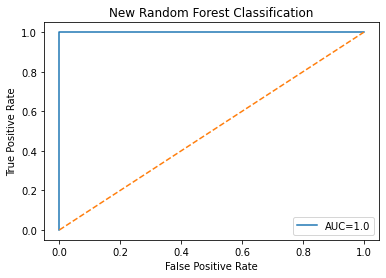

In [15]:
plt.plot(fpr,tpr,label="AUC="+str(new_classification_auc))
plt.plot([0, 1], linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('New Random Forest Classification')
plt.show()

Text(0.5, 1.0, 'New Random Forest Classification model')

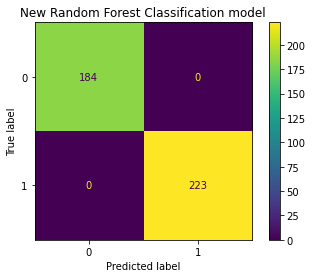

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, prediction_test)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('New Random Forest Classification model')

Classification

In [17]:
Y=basedf['label'].values
Y=Y.astype('int')
X=basedf[['sentencelabel','writer','site']].values
#X=X.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=6)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,random_state=10)
model.fit(X_train, Y_train)
prediction_test=model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[::,1]
print('Accuracy :',metrics.accuracy_score(Y_test,prediction_test))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_proba, pos_label=2)

classification_auc=metrics.roc_auc_score(Y_test, y_pred_proba)

Accuracy : 0.8892988929889298


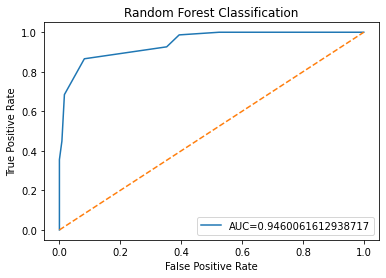

0.9460061612938717


In [18]:
plt.plot(fpr,tpr,label="AUC="+str(classification_auc))
plt.plot([0, 1], linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('Random Forest Classification')
plt.show()
print(classification_auc)

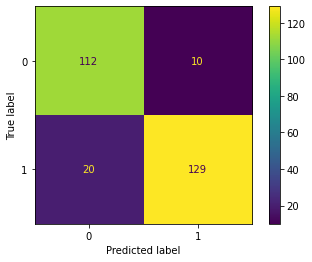

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, prediction_test)

cm_display = ConfusionMatrixDisplay(cm).plot()

Linear Regression: Author-Sentence truth

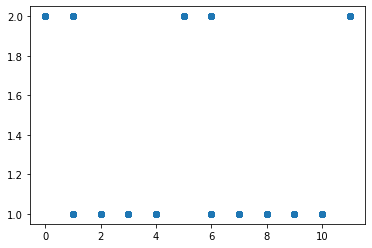

In [29]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

Y=basedf['label'].values
Y=Y.astype('int')
X=basedf['writer'].values
X=X.reshape(-1,1)
plt.scatter(X,Y)
#plt.show()

In [ ]:
# #Checking writer index output
# basedf.to_csv('writerindex.csv', index=False)

# print(basedf)

Accuracy:  0.02535682227490177
1.6075182352269466
[-0.02636049]


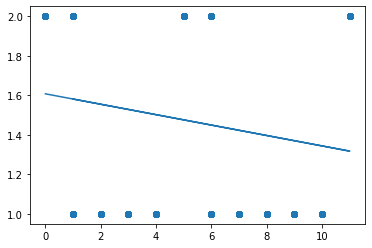

In [30]:
model=LinearRegression()
model=model.fit(X,Y)
r_sq=model.score(X,Y)
print("Accuracy: ",r_sq)
b_0=model.intercept_
b_1=model.coef_
print(b_0)  
print(b_1)
regression_line=b_1*X+b_0
plt.scatter(X,Y)
plt.plot(X,regression_line)

Logistic Regression

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [22]:
Y=basedf['label'].values
Y=Y.astype('int')

# basedf.author[basedf.author=="Nagy Gábor"]=1
# basedf.author[basedf.author=="Ismeretlen"]=0

X=basedf[['sentencelabel','writer','site']].values
logistic_regression=LogisticRegression()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=45)

logistic_regression.fit(X_train,Y_train)
Y_pred=logistic_regression.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[::,1]
confusion_matrix=pd.crosstab(Y_test,Y_pred,rownames=['Actual'],colnames=['Predicted'])
print(confusion_matrix)
print(metrics.accuracy_score(Y_test,Y_pred))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_proba, pos_label=2)

logistic_auc=metrics.roc_auc_score(Y_test, y_pred_proba)

Predicted    1    2
Actual             
1          168   31
2           46  162
0.8108108108108109


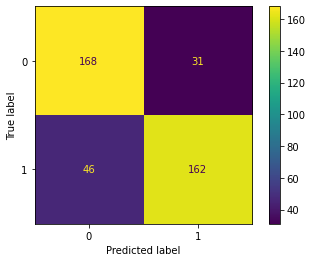

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

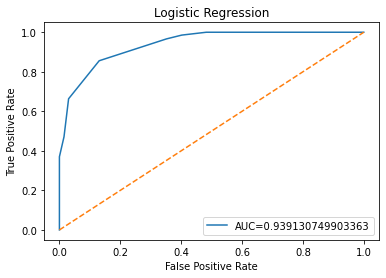

In [24]:
plt.plot(fpr,tpr,label="AUC="+str(logistic_auc))
plt.plot([0, 1], linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('Logistic Regression')
plt.show()